# 9. Wprowadzenie do analizy czasowych szeregów danych

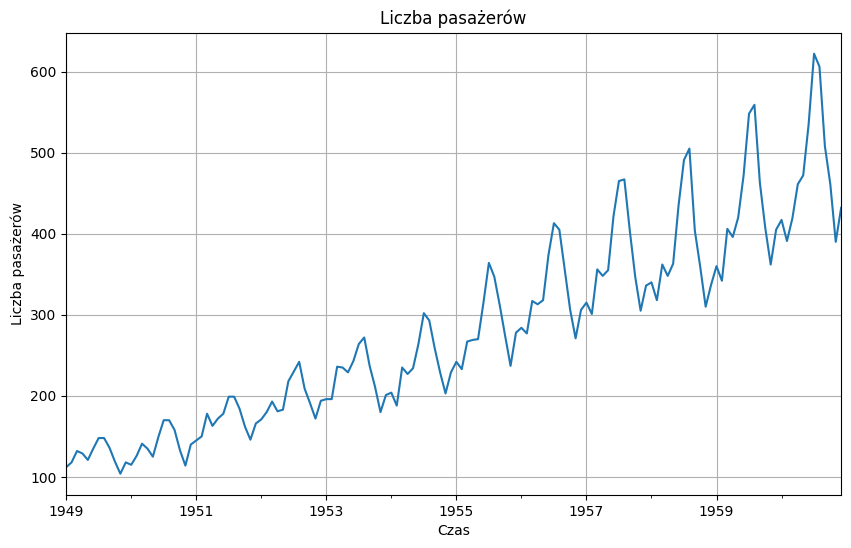

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, index_col='Month', parse_dates=True)

plt.figure(figsize=(10, 6))
data['Passengers'].plot(title="Liczba pasażerów", xlabel="Czas", ylabel="Liczba pasażerów")
plt.grid()
plt.show()

## Analiza autokorelacji (ACF i PACF)

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF i PACF
plot_acf(data['Passengers'], lags=20, title="Autokorelacja")
plot_pacf(data['Passengers'], lags=20, title="Częściowa autokorelacja", method='ywm')
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

## Dekompozycja szeregów czasowych

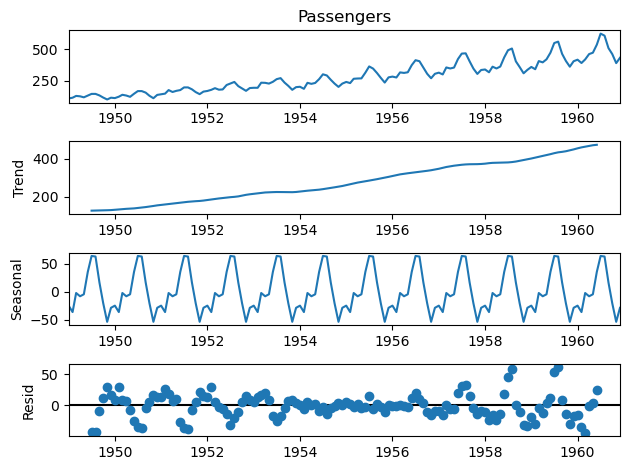

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Dekompozycja addytywna
result = seasonal_decompose(data['Passengers'], model='additive')
result.plot()
plt.show()

# Średnie ruchome

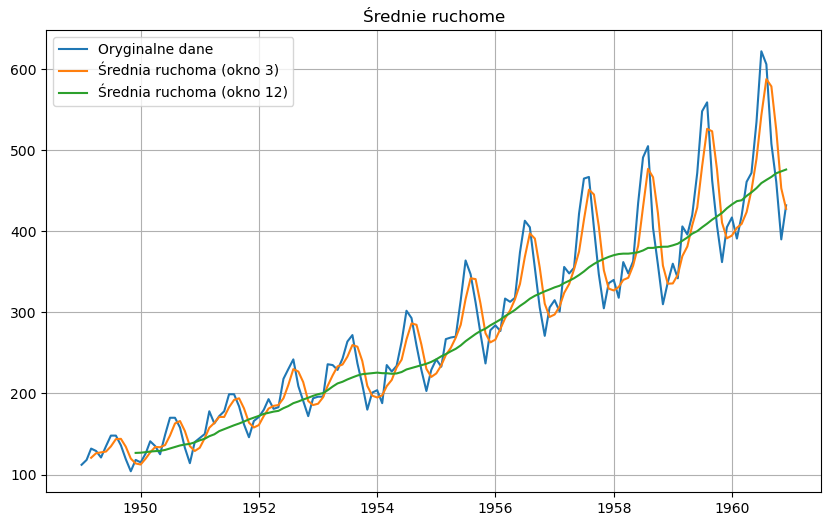

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, index_col='Month', parse_dates=True)

# Obliczanie średnich ruchomych
data['MA_3'] = data['Passengers'].rolling(window=3).mean()
data['MA_12'] = data['Passengers'].rolling(window=12).mean()

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(data['Passengers'], label="Oryginalne dane")
plt.plot(data['MA_3'], label="Średnia ruchoma (okno 3)")
plt.plot(data['MA_12'], label="Średnia ruchoma (okno 12)")
plt.title("Średnie ruchome")
plt.legend()
plt.grid()
plt.show()

# Test t-Studenta dla dwóch prób niezależnych

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Dane: wyniki dwóch grup
group1 = np.random.normal(50, 10, 30)
group2 = np.random.normal(55, 10, 30)

# Test t-Studenta
stat, p_value = ttest_ind(group1, group2)

# Wyniki
print("Statystyka testowa:", stat)
print("P-wartość:", p_value)
if p_value < 0.05:
    print("Odrzucamy hipotezę zerową")
else:
    print("Brak podstaw do odrzucenia hipotezy zerowej")

Statystyka testowa: -0.9681460086841576
P-wartość: 0.3369913745092534
Brak podstaw do odrzucenia hipotezy zerowej
